In [19]:
import pandas as pd
import numpy as np
import re
import sys
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

## Basic View of Dataset

In [20]:
nobel_data = pd.read_json('nobel_data.json')
nobel_data['is_winner'] = nobel_data['prize_status'].notnull()

#Dealing with input errors from data, where nonsense character is assigned to gender
nobel_data.loc[(nobel_data['Gender'] != 'M') & (nobel_data['Gender'] != 'F'), 'Gender'] = 'M'

nobel_data

,url,category,year,role,Name,City,Country,Gender,Profession,"Year, Birth","Year, Death",University,prize_status,State,Department,is_winner
0,https//www.nobelprize.org/nomination/archive/s...,Nomination for Nobel Peace Prize,1959,Nominee,Women´s International League for Peace and F...,Geneva,SWITZERLAND (CH),M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
1,https//www.nobelprize.org/nomination/archive/s...,Nomination for Nobel Peace Prize,1959,Nominator,Inger Segerstedt Wiberg,NaN,SWEDEN (SE),F,Member of Parliament,NaN,NaN,NaN,NaN,NaN,NaN,False
2,https//www.nobelprize.org/nomination/archive/s...,Nomination for Nobel Prize in Physics,1901,Nominee,William W Campbell,NaN,UNITED STATES (US),M,NaN,1862.0,1938.0,NaN,NaN,NaN,NaN,False
3,https//www.nobelprize.org/nomination/archive/s...,Nomination for Nobel Prize in Physics,1901,Nominee,Svante A Arrhenius,Stockholm,SWEDEN (SE),M,NaN,1859.0,1927.0,Stockholm University,Awarded the Nobel Prize in Chemistry,NaN,NaN,True
4,https//www.nobelprize.org/nomination/archive/s...,Nomination for Nobel Prize in Physics,1901,Nominee,Svante A Arrhenius,Stockholm,SWEDEN (SE),M,NaN,1859.0,1927.0,Stockholm University,Awarded the Nobel Prize in Chemistry,NaN,NaN,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40934,https//www.nobelprize.org/nomination/archive/s...,Nomination for Nobel Peace Prize,1964,Nominator,2 members of Yugoslav parliament,NaN,YUGOSLAVIA (YU),M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
40935,https//www.nobelprize.org/nomination/archive/s...,Nomination for Nobel Peace Prize,1964,Nominee,Norman Thomas,NaN,UNITED STATES (US),M,American politician,1884.0,1968.0,NaN,NaN,NaN,NaN,False
40936,https//www.nobelprize.org/nomination/archive/s...,Nomination for Nobel Peace Prize,1964,Nominator,John P Roche,NaN,NaN,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
40937,https//www.nobelprize.org/nomination/archive/s...,Nomination for Nobel Peace Prize,1964,Nominee,World Veterans Federation (Fédération Mondia...,Paris,FRANCE (FR),M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False


In [21]:
nominators = nobel_data[nobel_data['role'] == "Nominator"]
nominees = nobel_data[nobel_data['role'] == "Nominee"]

## Nominee Winning Percentage

In [22]:
unique_nominees = nominees.drop_duplicates(subset=['Name'])
num_winners = unique_nominees['is_winner'].sum()
print("Number of winners: ",num_winners)
print("Winning %: ",(num_winners/len(unique_nominees.index)) *100)

Number of winners:  373
Winning %:  11.438209138301135


## Gender Proportion Plots

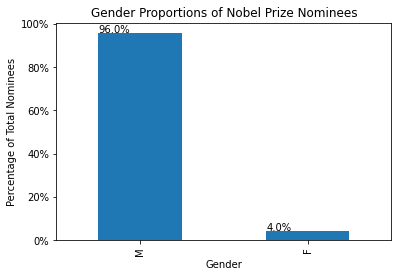

In [23]:
fig, ax = plt.subplots(1,1)
unique_nominees['Gender'].value_counts(normalize = True).plot(kind = 'bar', ax=ax)

for p in ax.patches:
    txt = np.round(p.get_height(), decimals=2) * 100
    ax.annotate(str(txt)+"%", (p.get_x() * 1.005, p.get_height() * 1.005))

ax.set_title("Gender Proportions of Nobel Prize Nominees")
ax.set_xlabel("Gender")
ax.set_ylabel("Percentage of Total Nominees")
ax.yaxis.set_major_formatter(PercentFormatter(1))

This plot represents the proportion of nominees in all categories over the total time period in which observations were recorded (1901-1967) that are male and female. Overall there is a whopping 96% of nominees who were male against only 4% female, showing a tremendous gender disparity

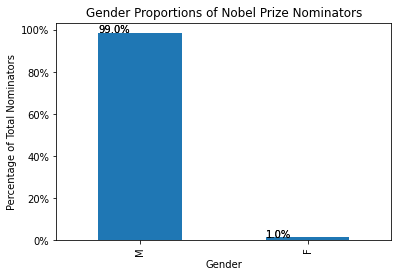

In [27]:
unique_nominators = nominators.drop_duplicates(subset=['Name'])

fig, ax = plt.subplots(1,1)
unique_nominators['Gender'].value_counts(normalize = True).plot(kind = 'bar', ax = ax)
for p in ax.patches:
    for p in ax.patches:
        txt = np.round(p.get_height(), decimals=2) * 100
        ax.annotate(str(txt)+"%", (p.get_x() * 1.005, p.get_height() * 1.005))

ax.set_title("Gender Proportions of Nobel Prize Nominators")
ax.set_xlabel("Gender")
ax.set_ylabel("Percentage of Total Nominators")
ax.yaxis.set_major_formatter(PercentFormatter(1))

This plot captures the proportion of nominators that were male and female. The gender disparity is even more profound with the nominators, with 99% being male to 1% being female.

Text(0.5, 0, 'Year')

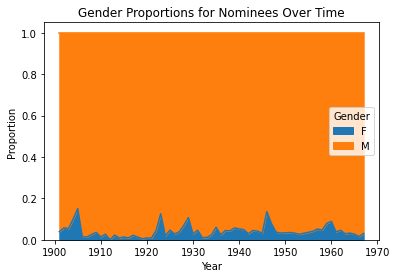

In [30]:
fig, ax = plt.subplots(1,1)
nominees_gender = nominees.groupby('year')['Gender'].value_counts(normalize=True).unstack()
nominees_gender.plot(kind ='area', legend = True, ax=ax)
ax.set_title("Gender Proportions for Nominees Over Time")
ax.set_ylabel("Proportion")
ax.set_xlabel("Year")

Text(0.5, 0, 'Year')

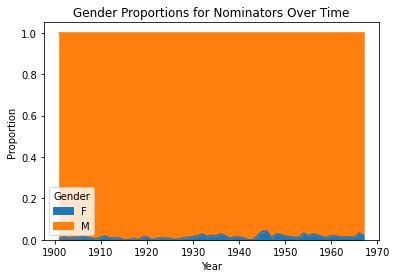

In [43]:
fig, ax = plt.subplots(1,1)
nominators_gender = nominators.groupby('year')['Gender'].value_counts(normalize=True).unstack()
nominators_gender.plot(kind ='area', legend = True, ax=ax)
ax.set_title("Gender Proportions for Nominators Over Time")
ax.set_ylabel("Proportion")
ax.set_xlabel("Year")

## Gender Proportions By Category

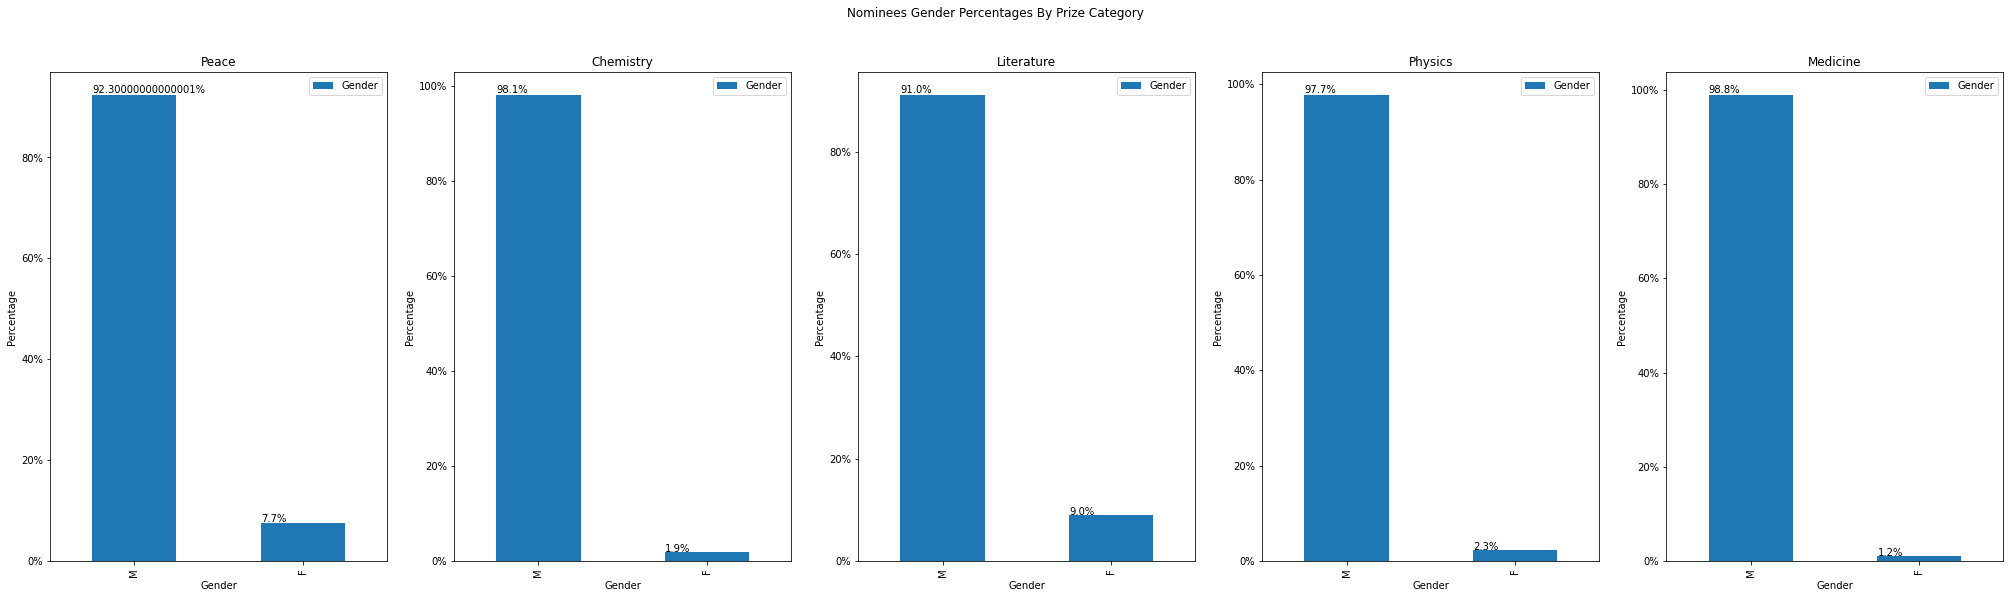

In [44]:
fig, axes = plt.subplots(1,5, figsize = (35,9))
fig.suptitle("Nominees Gender Percentages By Prize Category")

nominees_grouped = nominees.groupby('category')
# nominees.groupby('category')['Gender'].value_counts(normalize = True).unstack().plot(kind = 'bar', legend = True, ax=ax)
plot_areas = zip(nominees_grouped.groups.keys(), axes.flatten()) # creates list so that I can match plotting axes with group keys when I iterate

#Helper function to fix string formatting
def getSubtitle(key):
    if "Peace" in key:
        return "Peace"
    else:
        return key.split(" ")[-1]

for idx, (key, ax) in enumerate(plot_areas):
    group = nominees_grouped.get_group(key)
    subtitle = getSubtitle(key)
    group['Gender'].value_counts(normalize = True).round(4).plot(kind = 'bar', legend = True, ax=ax)
    ax.set_title(subtitle)
    ax.set_xlabel("Gender")
    ax.set_ylabel("Percentage")
    ax.yaxis.set_major_formatter(PercentFormatter(1))
    for p in ax.patches:
        txt = np.round(p.get_height(), decimals=3) * 100
        ax.annotate(str(txt)+"%", (p.get_x() * 1.005, p.get_height() * 1.005))

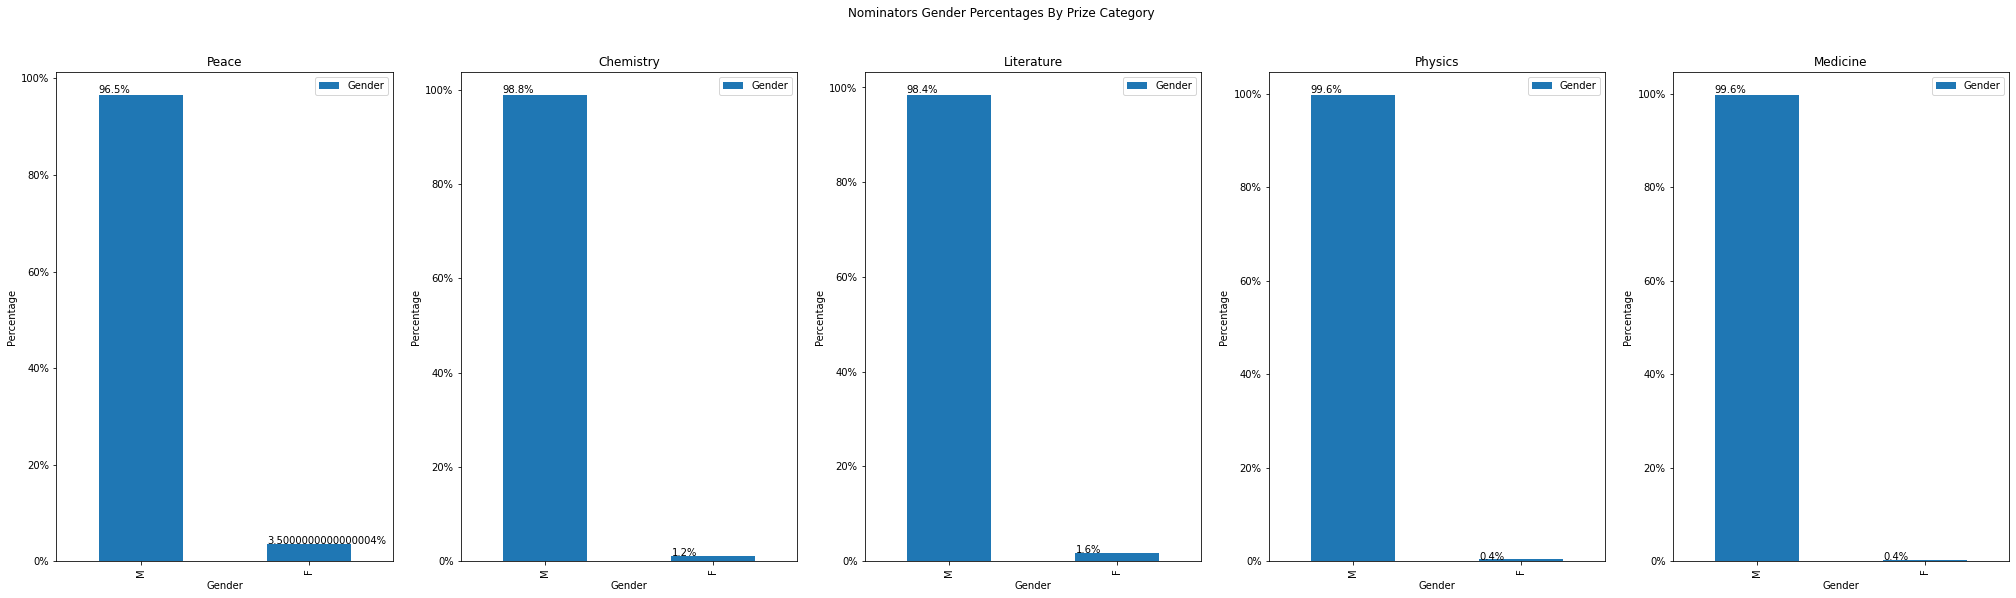

In [45]:
fig, axes = plt.subplots(1,5, figsize = (35,9))
fig.suptitle("Nominators Gender Percentages By Prize Category")

nominators_grouped = nominators.groupby('category')
# nominees.groupby('category')['Gender'].value_counts(normalize = True).unstack().plot(kind = 'bar', legend = True, ax=ax)
plot_areas = zip(nominators_grouped.groups.keys(), axes.flatten()) # creates list so that I can match plotting axes with group keys when I iterate

for idx, (key, ax) in enumerate(plot_areas):
    group = nominators_grouped.get_group(key)
    subtitle = getSubtitle(key)
    group['Gender'].value_counts(normalize = True).round(4).plot(kind = 'bar', legend = True, ax=ax)
    ax.set_title(subtitle)
    ax.set_xlabel("Gender")
    ax.set_ylabel("Percentage")
    ax.yaxis.set_major_formatter(PercentFormatter(1))
    for p in ax.patches:
    	txt = np.round(p.get_height(), decimals=3) * 100
    	ax.annotate(str(txt)+"%", (p.get_x() * 1.005, p.get_height() * 1.005))

### Is there at least marginally greater representation of women among winners?

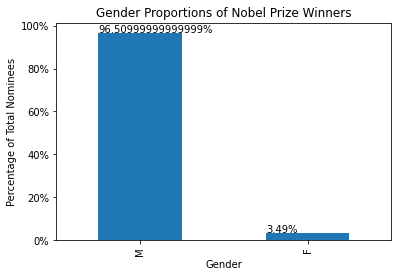

In [46]:
winners = unique_nominees[unique_nominees['is_winner'] == True]

fig, ax = plt.subplots(1,1)
winners['Gender'].value_counts(normalize = True).round(4).plot(kind = 'bar', ax=ax)

for p in ax.patches:
    ax.annotate(str(p.get_height()*100)+"%", (p.get_x() * 1.005, p.get_height() * 1.005))

ax.set_title("Gender Proportions of Nobel Prize Winners")
ax.set_xlabel("Gender")
ax.set_ylabel("Percentage of Total Nominees")
ax.yaxis.set_major_formatter(PercentFormatter(1))

## Age Distributions Nominees/Nominators by overall/by category/binned changes in the distributions

In [47]:
nominators.describe()

,year,"Year, Birth","Year, Death"
count,18792.000000,5229.000000,4912.000000
mean,1935.366379,1879.694397,1960.376221
std,19.709333,24.532483,25.842870
min,1901.000000,1647.000000,1885.000000
25%,1919.000000,1862.000000,1940.000000
50%,1935.000000,1882.000000,1964.000000
75%,1953.000000,1899.000000,1980.000000
max,1967.000000,1956.000000,2017.000000


In [48]:
nominees.describe()

,year,"Year, Birth","Year, Death"
count,22147.000000,18225.000000,16785.000000
mean,1935.733824,1877.929712,1956.947036
std,19.591170,24.037674,25.266414
min,1901.000000,1647.000000,1901.000000
25%,1920.000000,1861.000000,1938.000000
50%,1935.000000,1878.000000,1960.000000
75%,1953.000000,1896.000000,1974.000000
max,1967.000000,1987.000000,2019.000000
